In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Basic supervised learning
"Logistic regression" is the simplest form of "supervised learning". We have a population of items, some of which are labeled but most of which are not labeled. The goal is to label the unlabeled items, based upon the items we have already labeled. In the case of basic logistic regression it is assumed that the categorizations to be learned are linear; i.e., they're characterized as hyperplanes in n-d space. Let's explore the effects of logistic regression by creating some examples and studying how well they work. 

A general note on automatic grading: In this assignment, passing the automatic tests does _not_ mean your answer is correct. _The automatic grader only checks format._ Your answer is also human-graded for content.  

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.linear_model import LogisticRegression

<!-- BEGIN QUESTION -->

*Question 1:* Create a uniformly distributed 3-d space of 1000 points, named `df`, with columns `X`, `Y`, `Z` with values between 0 and 100 in floating point. Categorize the points according to the linear inequality `X + 2*Y + 3*Z < 200`, and create a `Categorical` column 'label' that has one of two values: "inside" or "outside", where "inside" columns obey the inequality. 

In [3]:
# Define a variable df satisfying the above conditions. 
x = np.random.uniform(0.0, 100, 1000)
y = np.random.uniform(0.0, 100, 1000)
z = np.random.uniform(0.0, 100, 1000)

data = []
for i in range(1000):
    num = x[i] + 2*y[i] + 3*z[i]
    if num < 200:
        data.append([x[i], y[i], z[i], 'inside'])
    else:
        data.append([x[i], y[i], z[i], 'outside'])
df = pd.DataFrame(data, columns = ['X', 'Y', 'Z', 'label'])
df['label'] = df['label'].astype('category')

In [4]:
grader.check("q1")

q1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* Simulate fuzzy categories by adding a normal error function with mean 0 and standard deviation 50 to each of `X`, `Y`, and `Z` in `df`, to create a new DataFrame `df2`.  

In [5]:
def add_noise(df, mean, sd):
    new_df = df.copy().drop(['label'], axis = 1)
    new_df += np.random.normal(mean, sd, size = (1000,3))
    new_df['label'] = df['label']
    return new_df
df2 = add_noise(df, 0, 50)

In [6]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:* Do logistic regression on df2, to create a predictor for `label` from `X`, `Y`, `Z`. Put the output into `regr`. Hint: you will need to format columns of the `DataFrame` into an `ndarray` appropriate for regression. 

In [7]:
def run_lr(df2): 
    regr = LogisticRegression(solver='lbfgs')  # avoid an annoying and meaningless warning
    x_train = df2.drop(['label'], axis = 1)
    y_train = df2['label']
    y_train = np.ravel(y_train)
    regr.fit(x_train, y_train)
    return regr

In [8]:
grader.check("q3")

q3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* Perform a manual cross-validation on this fit. 
1. Create a new DataFrame df_train that contains the first 750 rows of df2.
2. Create a new DataGrame df_test that contains the last 250 rows of df2. 
2. Fit a new logistic regression regr2 to df_train. 
3. Test this fit against the last 250 rows of df_test. 
4. Compute FP, FN, TP, TN, precision, recall, and F1 as defined in lecture. 

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def run_xv(df):
    regr2 = run_lr(df.iloc[:750])
    df_test = df.iloc[750:]
    x_test = df_test.drop(['label'], axis = 1)
    y_test = df_test.drop(['X', 'Y', 'Z'], axis = 1)
    y_test = np.ravel(y_test)
    y_pred = regr2.predict(x_test)
    
    TP = (sum((y_pred == 'inside') & (y_test == 'inside')))
    TN = (sum((y_pred == 'outside') & (y_test == 'outside')))
    FP = (sum((y_pred == 'inside') & (y_test == 'outside')))
    FN = (sum((y_pred == 'outside') & (y_test == 'inside')))
    
    if(TP + FP == 0):
        precision = 0
    else:
        precision = TP / (TP + FP)
    if(TP + FN == 0):
        recall = 0
    else:
        recall = TP / (TP + FN)
    if(precision == 0 or recall == 0):
        F1 = 0
    else:
        F1 = 2 / (1/precision + 1/recall)
    return (TP, TN, FP, FN, precision, recall, F1)

# Run this to expose your results to me: 
results = run_xv(df2)
TP = results[0]
TN = results[1]
FP = results[2]
FN = results[3]
precision = results[4]
recall = results[5]
F1 = results[6]
print("TP={}, TN={}".format(TP, TN))
print("FP={}, FN={}".format(FP, FN))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("F1: {}".format(F1))

TP=7, TN=187
FP=13, FN=43
precision: 0.35
recall: 0.14
F1: 0.2


In [10]:
grader.check("q4")

q4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 5:* Plot the relationship between the standard deviation of the noise in `df2` and the F1 score of the result. Show your result as a plot where `X` is the noise standard deviation and `Y` is the F1 score. 

Hints: try plotting stds between 0 and 100. Note that if the std is high enough, _the precision will be undefined!_ 

Ellipsis

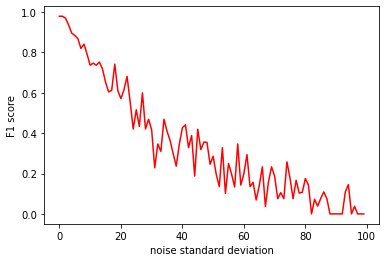

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.linear_model import LogisticRegression

f = list()
for i in range(100):
    new_df = add_noise(df, 0, i)
    f.append(run_xv(new_df)[6])
    
mpl.xlabel('noise standard deviation')
mpl.ylabel('F1 score')
mpl.plot(np.arange(0,100), f, 'r-')
...


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [12]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [13]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)